<a href="https://colab.research.google.com/github/line-ar/Projeto_R/blob/main/trabalhopand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Filmes brasileiros e estrangeiros exibidos de 2009 a 2019.**

O projeto teve como objetivo analisar a participação dos filmes nacionais nos cinemas brasileiros e a sua relação com os filmes estrangeiros, bem como o acesso ao cinema pela população.

**Upgrades**

**Importações** 


In [ ]:
!pip install plotly --upgrade
!pip install -U scikit-learn

In [ ]:
#Criação do caminho para o dataset
path = '/content/DATA/Listagem_dos_Filmes_Brasileiros_e_Estrangeiros_Exibidos_2009_a_2019.csv'

#Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

**1 - Leitura e Exibição com Pandas**

In [ ]:
data_filme = pd.read_csv(path)
data_filme.head(50)

,Unnamed: 0,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,0,2019,120 Batimentos Por Minuto,Ficção,França,Estrangeira,Imovision,Distribuição Nacional,10.0,70.0
1,1,2019,3 Faces,Ficção,Irã,Estrangeira,Imovision,Distribuição Nacional,6289.0,103805.0
2,2,2019,45 Dias Sem Você,Ficção,Brasil,Brasileira,O2 Play,Distribuição Nacional,3303.0,31295.0
3,3,2019,A 100 Passos De Um Sonho,Ficção,Estados Unidos,Estrangeira,Disney,Distribuição Internacional,69.0,4186.0
4,4,2019,A Abelhinha Maya - O Filme,Animação,Alemanha,Estrangeira,Playarte,Distribuição Nacional,402.0,3531.0
5,5,2019,A Batalha Das Correntes,Ficção,Estados Unidos,Estrangeira,Diamond Films,Distribuição Nacional,19579.0,425304.0
6,6,2019,A Bela da Tarde,Ficção,"França, Itália",Estrangeira,Zeta Filmes,Distribuição Nacional,14.0,253.0
7,7,2019,A Cabeça De Gumercindo Saraiva,Ficção,Brasil,Brasileira,Elo Company,Distribuição Nacional,195.0,1830.0
8,8,2019,A Caminho De Casa,Ficção,Estados Unidos,Estrangeira,Sony,Distribuição Internacional,652641.0,9445705.0
9,9,2019,A Casa De Veraneio,Ficção,"França, Itália",Estrangeira,Imovision,Distribuição Nacional,8001.0,137759.0


In [ ]:
data_filme.describe()

,Unnamed: 0,Ano de exibição,Público no ano de exibição,Renda (R$) no ano de exibição
count,7052.000000,7052.000000,7.052000e+03,7.052000e+03
mean,3536.842881,2014.344867,2.438021e+05,3.105320e+06
std,2042.750038,3.104598,9.412036e+05,1.282943e+07
min,0.000000,2009.000000,0.000000e+00,0.000000e+00
25%,1768.750000,2012.000000,3.470000e+02,3.021625e+03
50%,3531.500000,2015.000000,3.947500e+03,4.297715e+04
75%,5308.250000,2017.000000,4.491825e+04,5.779531e+05
max,7080.000000,2019.000000,1.965647e+07,3.386249e+08


In [ ]:
print(data_filme.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7052 entries, 0 to 7051
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       7052 non-null   int64  
 1   Ano de exibição                  7052 non-null   int64  
 2   Título da obra                   7052 non-null   object 
 3   Gênero                           7052 non-null   object 
 4   País(es) produtor(es) da obra    7052 non-null   object 
 5   Nacionalidade da obra            7052 non-null   object 
 6   Empresa distribuidora            7052 non-null   object 
 7   Origem da empresa distribuidora  7052 non-null   object 
 8   Público no ano de exibição       7052 non-null   float64
 9   Renda (R$) no ano de exibição    7052 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 551.1+ KB
None


In [ ]:
print(data_filme.nunique())
print(data_filme.head())

Unnamed: 0                         7052
Ano de exibição                      11
Título da obra                     4960
Gênero                                4
País(es) produtor(es) da obra       466
Nacionalidade da obra                 2
Empresa distribuidora               362
Origem da empresa distribuidora       3
Público no ano de exibição         5074
Renda (R$) no ano de exibição      6544
dtype: int64
   Unnamed: 0  ...  Renda (R$) no ano de exibição
0           0  ...                           70.0
1           1  ...                       103805.0
2           2  ...                        31295.0
3           3  ...                         4186.0
4           4  ...                         3531.0

[5 rows x 10 columns]


In [ ]:
print(f"De {data_filme['Título da obra'].nunique()} obras, houve uma renda total de {data_filme['Renda (R$) no ano de exibição'].sum()} e uma exibição de {data_filme['Público no ano de exibição'].sum()}")
generos = data_filme['Gênero'].drop_duplicates()
print(f"Gêneros: {generos[0]}, {generos[4]}, {generos[28]} e {generos[1512]}")



De 4960 obras, houve uma renda total de 21898719589.8 e uma exibição de 1719292644.0
Gêneros: Ficção, Animação, Documentário e Videomusical


**2 - Tratamento dos dados**

In [ ]:
data_filme.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data_filme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7052 entries, 0 to 7051
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ano de exibição                  7052 non-null   int64  
 1   Título da obra                   7052 non-null   object 
 2   Gênero                           7052 non-null   object 
 3   País(es) produtor(es) da obra    7052 non-null   object 
 4   Nacionalidade da obra            7052 non-null   object 
 5   Empresa distribuidora            7052 non-null   object 
 6   Origem da empresa distribuidora  7052 non-null   object 
 7   Público no ano de exibição       7052 non-null   float64
 8   Renda (R$) no ano de exibição    7052 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 496.0+ KB


In [ ]:
# Após observar a coluna "Público no ano de exibição" vemos que ela está como Float então fazemos a mudança na tipagem para inteiro.
data_filme['Público no ano de exibição'] = data_filme['Público no ano de exibição'].astype(int)


**3 - Agrupamento de informações.**

Mediana do público de exibição e renda.

In [ ]:
data_filme.groupby(['Nacionalidade da obra', 'Ano de exibição', 'Gênero']).median().head(60)


Público no ano de exibição  Renda (R$) no ano de exibição
Nacionalidade da obra Ano de exibição Gênero                                                                 
Brasileira            2009            Animação                          9880.5                      29643.000
                                      Documentário                       909.0                       4986.000
                                      Ficção                            1060.0                       4334.500
                      2010            Animação                          4834.0                      14803.000
                                      Documentário                       907.5                       8016.500
                                      Ficção                            2500.0                      12227.750
                      2011            Animação                           909.0                       3135.170
                                      Documentário                       813.0                       4397.500
                                      Ficção                            3337.0                      22966.375
                                      Videomusical                     21842.0                     291939.000
                      2012            Animação                           280.0                       2211.000
                                      Documentário                       485.5                       4124.135
                                      Ficção                            2405.0                      17101.300
                      2013            Animação                          8600.0                      62408.520
                                      Documentário                       797.0                       7791.500
                                      Ficção                            2459.0                      22519.740
                      2014            Animação                         10865.0                     142564.190
                                      Documentário                       956.0                       7224.990
                                      Ficção                            2266.0                      23211.820
                      2015            Animação                          1607.0                      11602.070
                                      Documentário                       606.0                       8333.000
                                      Ficção                            1347.0                      13035.680
                      2016            Animação                         24832.0                     293092.420
                                      Documentário                       280.5                       2775.820
                                      Ficção                            1916.5                      23433.520
                      2017            Animação                          2380.0                      33137.070
                                      Documentário                       286.0                       3370.000
                                      Ficção                            2180.0                      23140.460
                      2018            Animação                           110.5                        631.500
                                      Documentário                       607.0                       7191.000
                                      Ficção                            2606.5                      31340.500
                      2019            Animação                          8771.5                      99590.500
                                      Documentário                       413.0                       5414.500
                                      Ficção                            1046.5                      12363.500
Estrangeira           2009            Animação                         77000.0              

Contagem de lançamentos por nacionalidade com a média do público de exibição e renda anual.

In [ ]:
data_filme.groupby('Nacionalidade da obra').agg({
    'Nacionalidade da obra':'count',
    'Público no ano de exibição':'mean',
    'Renda (R$) no ano de exibição': 'mean'

 }
)

,Nacionalidade da obra,Público no ano de exibição,Renda (R$) no ano de exibição
Nacionalidade da obra,,,
Brasileira,2106,114015.219373,1.277719e+06
Estrangeira,4946,299065.222806,3.883511e+06


**4 - Gráfico de maiores lançamentos por gênero.**

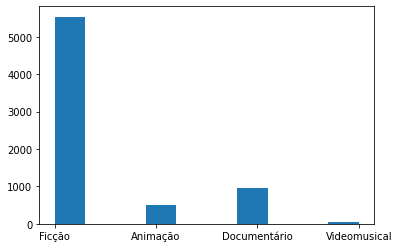

In [ ]:
plt.hist(x = data_filme['Gênero']);


**Gráfico de comparação de visualizações entre nacionalidade.**

In [ ]:
fig = px.pie(data_filme, values='Público no ano de exibição', names='Nacionalidade da obra', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

**Número de exibição por ano.**

In [ ]:
grafico = px.scatter_matrix(data_filme, dimensions=['Ano de exibição', 'Público no ano de exibição'], color="Público no ano de exibição") 
grafico.show()

In [ ]:
fig = px.line(data_filme, x='Ano de exibição', y="Público no ano de exibição", color="Ano de exibição")
fig.show()

Quantidade de lançamentos por ano.

In [ ]:
ano_lanc = data_filme['Ano de exibição']
ano_lanc.value_counts()

2015    794
2016    767
2018    707
2017    703
2019    677
2014    675
2009    584
2013    568
2011    558
2012    510
2010    509
Name: Ano de exibição, dtype: int64

Densidade de lançamentos por ano

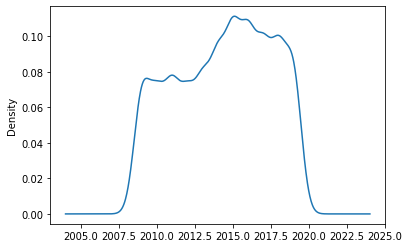

In [ ]:
data_filme["Ano de exibição"].plot(kind="density")  
plt.show()


**Número de laçamento de filmes por empresas.**

In [ ]:
empresa_dist = data_filme['Empresa distribuidora']
empresa_dist.value_counts().head(60)

Imovision                                687
Paris                                    428
Imagem                                   380
Sony                                     378
Vitrine Filmes                           327
Fox                                      321
Warner                                   308
Pandora Filmes                           286
Califórnia                               266
Universal                                243
Disney                                   228
Playarte                                 193
Diamond Films                            151
Paramount                                149
Esfera Produções                         138
Europa                                   133
Alphaville Filmes                        131
Zeta Filmes                              121
Downtown/Paris                           120
Espaço Filmes                            119
Filmes da Mostra                          91
Elo Company                               75
Cinemark B

## **Explorando variáveis:**

**5 - Quebrar os dados em conjunto de treino e conjunto de teste**

In [ ]:
col_mac = ['Ano de exibição','Público no ano de exibição','Renda (R$) no ano de exibição']
data_filme.dropna(subset=col_mac, inplace=True) 


X = data_filme[col_mac].to_numpy()
y = data_filme['Ano de exibição'].to_numpy()
print(X.shape, y.shape)


(7052, 3) (7052,)


In [ ]:
X # Numpy Array apenas com números

array([[2.0190000e+03, 1.0000000e+01, 7.0000000e+01],
       [2.0190000e+03, 6.2890000e+03, 1.0380500e+05],
       [2.0190000e+03, 3.3030000e+03, 3.1295000e+04],
       ...,
       [2.0090000e+03, 9.4588000e+04, 8.7017100e+05],
       [2.0090000e+03, 3.3291000e+04, 3.0327638e+05],
       [2.0090000e+03, 2.1070000e+03, 8.9540000e+03]])

In [ ]:
y # Numpy Array 2019 a 2009

array([2019, 2019, 2019, ..., 2009, 2009, 2009])

In [ ]:
print('Nomes dos Atributos: ', col_mac, '\n')
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Nomes dos Atributos:  ['Ano de exibição', 'Público no ano de exibição', 'Renda (R$) no ano de exibição'] 

Tamanho de X:  (7052, 3) 

Tamanho de y:  (7052,) 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=130)


In [ ]:
print(f"Tamanho de treino X_train: {X_train.shape}")
print(f"Tamanho de teste X_test: {X_test.shape}")
print(f"Tamanho de treino y_train: {y_train.shape}")
print(f"Tamanho de teste y_test: {y_test.shape}")

Tamanho de treino X_train: (5289, 3)
Tamanho de teste X_test: (1763, 3)
Tamanho de treino y_train: (5289,)
Tamanho de teste y_test: (1763,)


### **REGRESSÃO LOGÍSTICA**

**6 - Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador)**

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log', learning_rate='constant', max_iter=10,
                   eta0=0.0001, verbose=1, tol=None, random_state=130)

In [ ]:
clf.fit(X_train, y_train)

-- Epoch 1
Norm: 3118.28, NNZs: 3, Bias: -0.005850, T: 5289, Avg. loss: 403048095.886257
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5096.50, NNZs: 3, Bias: -0.006150, T: 10578, Avg. loss: 354108355.334804
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5689.30, NNZs: 3, Bias: -0.022550, T: 15867, Avg. loss: 219068707.044837
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 7118.83, NNZs: 3, Bias: -0.021650, T: 21156, Avg. loss: 296999012.413173
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 15358.50, NNZs: 3, Bias: -0.052950, T: 26445, Avg. loss: 281934848.579271
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 10289.29, NNZs: 3, Bias: -0.052850, T: 31734, Avg. loss: 374809412.712630
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 11378.76, NNZs: 3, Bias: -0.077950, T: 37023, Avg. loss: 175901938.123184
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 12278.65, NNZs: 3, Bias: -0.094050, T: 42312, Avg. loss: 188389981.661358
Total training time: 0.01 second

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished


SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log', max_iter=10,
              random_state=130, tol=None, verbose=1)

### **Coeficientes do modelo**

In [ ]:
for col_mac, coef in zip(col_mac, clf.coef_[0].tolist()):
    print(f"{col_mac}: {round(coef,3)}")
    # Constante do modelo
    print(f"Constante: {clf.intercept_}")

Ano de exibição: -253.403
Constante: [-0.12515 -0.23175 -0.17055 -0.10455 -0.04805 -0.03675  0.01255 -0.00865
 -0.02105 -0.06635 -0.04025]
Público no ano de exibição: 14123.78
Constante: [-0.12515 -0.23175 -0.17055 -0.10455 -0.04805 -0.03675  0.01255 -0.00865
 -0.02105 -0.06635 -0.04025]
Renda (R$) no ano de exibição: -4094.874
Constante: [-0.12515 -0.23175 -0.17055 -0.10455 -0.04805 -0.03675  0.01255 -0.00865
 -0.02105 -0.06635 -0.04025]


### **ACURÁCIA DO MODELO**

**7 - Verifica o desempenho**

In [ ]:
y_pred = clf.predict(X_test)
print(f"Acurácia de Teste: ±{mean_absolute_error(y_test, y_pred):1.0f}")

Acurácia de Teste: ±4


**Segundo Tratamento**

In [ ]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)

In [ ]:
print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Treino: {round(accuracy_score(y_test_true, y_test_pred), 2)}")


Acurácia de Treino: 0.08

 ---------------------------

Acurácia de Treino: 0.08
